<a href="https://colab.research.google.com/github/lisolano/ModuloVI/blob/main/Copia_de_MDE_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from datetime import date
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

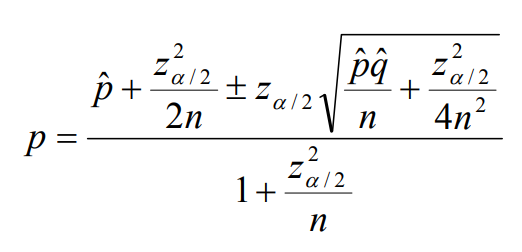

In [2]:

def wilson_confidence_interval(n, p_hat, c):


    z_score = st.norm.ppf(1 - ((1 - c) / 2))
    correction_1 = z_score * z_score / (2*n)
    correction_2 = z_score * np.sqrt((p_hat*(1-p_hat) + z_score * z_score/(4 * n))/n) / (1 + z_score * z_score /n)
    additive_part = correction_1 + correction_2

    return (p_hat - additive_part, p_hat + additive_part)

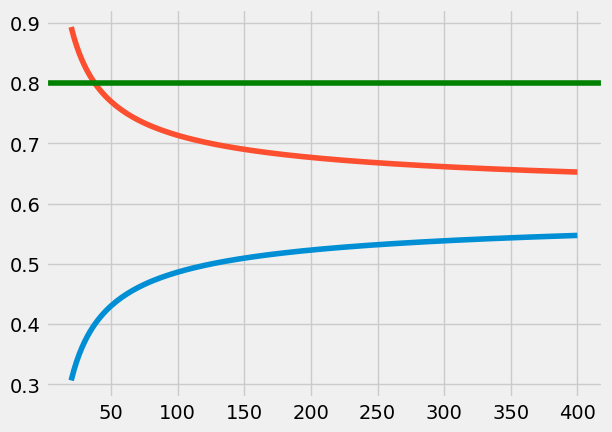

In [3]:


# p means metric base line
p = .60
#N means estimated initial control group size
N = 20
uplift = .2
cis = [wilson_confidence_interval(n,p, 0.95) for n in np.arange(1.0, 20.1, 0.1)*N]

plt.plot(np.arange(1.0, 20.1, 0.1)*N, np.array(cis)[:, 0])
plt.plot(np.arange(1.0, 20.1, 0.1)*N, np.array(cis)[:, 1])
plt.axhline(y=p+uplift, color='g', linestyle='-')

In [ ]:
df = pd.DataFrame(data=cis)
df["size"] = np.arange(1.0, 20.1, 0.1)*N
df["min_uplift_captured"] = df[1]-p

In [ ]:
df[df["min_uplift_captured"]<uplift]

,0,1,size,min_uplift_captured
115,0.580042,0.619958,2500.0,0.019958
116,0.580124,0.619876,2520.0,0.019876
117,0.580206,0.619794,2540.0,0.019794
118,0.580286,0.619714,2560.0,0.019714
119,0.580365,0.619635,2580.0,0.019635
...,...,...,...,...
186,0.584181,0.615819,3920.0,0.015819
187,0.584223,0.615777,3940.0,0.015777
188,0.584264,0.615736,3960.0,0.015736
189,0.584305,0.615695,3980.0,0.015695
